In [2]:
from glob import glob
import locale
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [3]:
locale.setlocale(locale.LC_ALL,'pt')

'pt'

In [4]:
paths = glob('EAR/*')
columns = ['ear_data', 'ear_max_subsistema','ear_verif_subsistema_mwmes', 'ear_verif_subsistema_percentual']
id_subs = ['NE','N','SE','S']
dataframe_dict = dict(zip(id_subs, [pd.DataFrame()]*len(id_subs)))

In [5]:
for path in paths:
    df = pd.read_csv(path,sep=';')

    for key in dataframe_dict.keys():
        aux = df.loc[df['id_subsistema']==key].copy()
        aux.index = pd.to_datetime(aux[columns[0]])
        aux = aux[columns[1:]].copy()
        aux.columns = [element + f'_{key}' for element in aux.columns]
        dataframe_dict[key] = pd.concat([dataframe_dict[key], aux])

In [6]:
dataframe_dict['S']

,ear_max_subsistema_S,ear_verif_subsistema_mwmes_S,ear_verif_subsistema_percentual_S
ear_data,,,
2000-01-01,13976.000000,7094.000000,50.759998
2000-01-02,13976.000000,7084.000000,50.689999
2000-01-03,13976.000000,7016.000000,50.200001
2000-01-04,13976.000000,6980.000000,49.939999
2000-01-05,13976.000000,6946.000000,49.700001
...,...,...,...
2023-03-28,20459.242188,17056.121094,83.366302
2023-03-29,20459.242188,16988.232422,83.034500
2023-03-30,20459.242188,16976.476562,82.977097


In [7]:
final_dataframe = pd.concat(list(dataframe_dict.values()),axis=1)

In [8]:
[i for i in range(4) if i!=2]

[0, 1, 3]

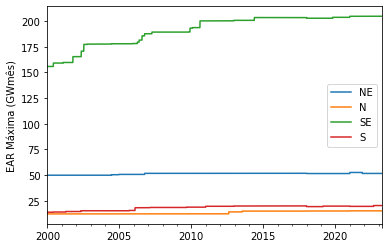

In [9]:
ax = (final_dataframe[final_dataframe.columns[0::3]]/1000).plot(ylabel='EAR Máxima (GWmês)', xlabel='')
ax.legend(['NE','N','SE','S'])

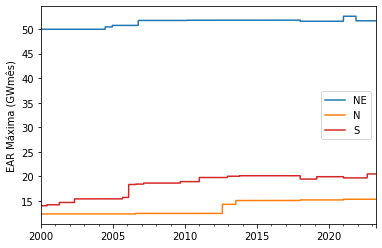

In [10]:
ax = (final_dataframe[final_dataframe.columns[0::3]]/1000).plot(ylabel='EAR Máxima (GWmês)', xlabel='')
ax.lines.remove(ax.lines[2])
#ax.set_ylim([5,60])
ax.relim()
ax.autoscale_view()
ax.legend(['NE','N','S'])

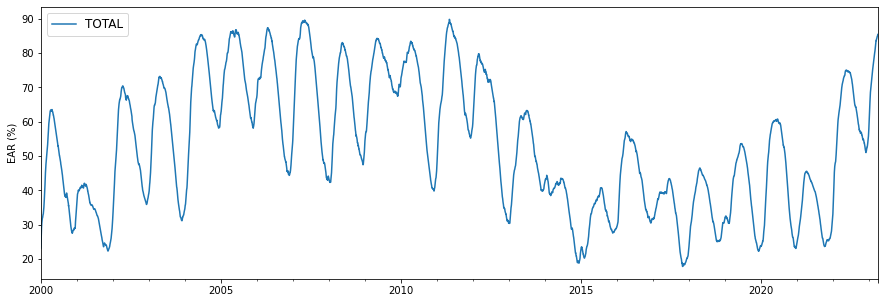

In [11]:
ax = (final_dataframe[final_dataframe.columns[1::3]].sum(axis=1)/final_dataframe[final_dataframe.columns[0::3]].sum(axis=1)*100).plot(ylabel='EAR (%)', xlabel='', figsize=(15,5))
ax.legend(['TOTAL'], loc='upper left', fontsize=12)
#ax.set_ylim([0,100])

In [12]:
zoom_dataframe = final_dataframe.loc[lambda x: (x.index >= '2014-01-01')&(x.index <= '2022-01-01')]

In [13]:
armazenamento_total_df = pd.DataFrame(columns=['EAR%'])

In [14]:
armazenamento_total_df['EAR%'] = (final_dataframe[final_dataframe.columns[1::3]].sum(axis=1)/final_dataframe[final_dataframe.columns[0::3]].sum(axis=1)*100)

In [28]:
analise_df = armazenamento_total_df.resample('YS').agg(['first','max'])['EAR%']

In [30]:
analise_df['min'] = armazenamento_total_df.loc[lambda x: x.index.month>7].resample('YS').agg(['min'])['EAR%']

In [43]:
analise_df

,first,max,min,Variação,Variação_f
ear_data,,,,,
2000-01-01,23.177150,63.561956,27.580614,40.384806,-35.981341
2001-01-01,36.940582,42.080586,22.337448,5.140003,-19.743138
2002-01-01,32.581431,70.388474,35.873638,37.807043,-34.514836
2003-01-01,39.178490,73.246061,31.145486,34.067571,-42.100575
2004-01-01,34.644000,85.425425,58.139390,50.781424,-27.286035
2005-01-01,62.669621,86.777524,58.128505,24.107902,-28.649019
2006-01-01,67.478000,87.393492,44.364659,19.915492,-43.028832
2007-01-01,55.302587,89.637664,42.955310,34.335077,-46.682354
2008-01-01,43.475927,83.098333,47.470633,39.622406,-35.627700


In [46]:
analise_df['Variação'] = analise_df['max'] - analise_df['first']
analise_df['Variação_f'] = (analise_df['min'] - analise_df['max'])

In [33]:
analise_df.head()

,first,max,min,Variação,Variação_f
ear_data,,,,,
2000-01-01,23.177150,63.561956,27.580614,40.384806,-35.981341
2001-01-01,36.940582,42.080586,22.337448,5.140003,-19.743138
2002-01-01,32.581431,70.388474,35.873638,37.807043,-34.514836
2003-01-01,39.178490,73.246061,31.145486,34.067571,-42.100575
2004-01-01,34.644000,85.425425,58.139390,50.781424,-27.286035


In [34]:
tipla_teste = (1,2)

In [35]:
armazenamento_total_df

,EAR%
ear_data,
2000-01-01,23.177150
2000-01-02,23.747376
2000-01-03,24.527936
2000-01-04,25.587790
2000-01-05,26.595061
...,...
2023-03-28,85.000298
2023-03-29,85.053988
2023-03-30,85.198943


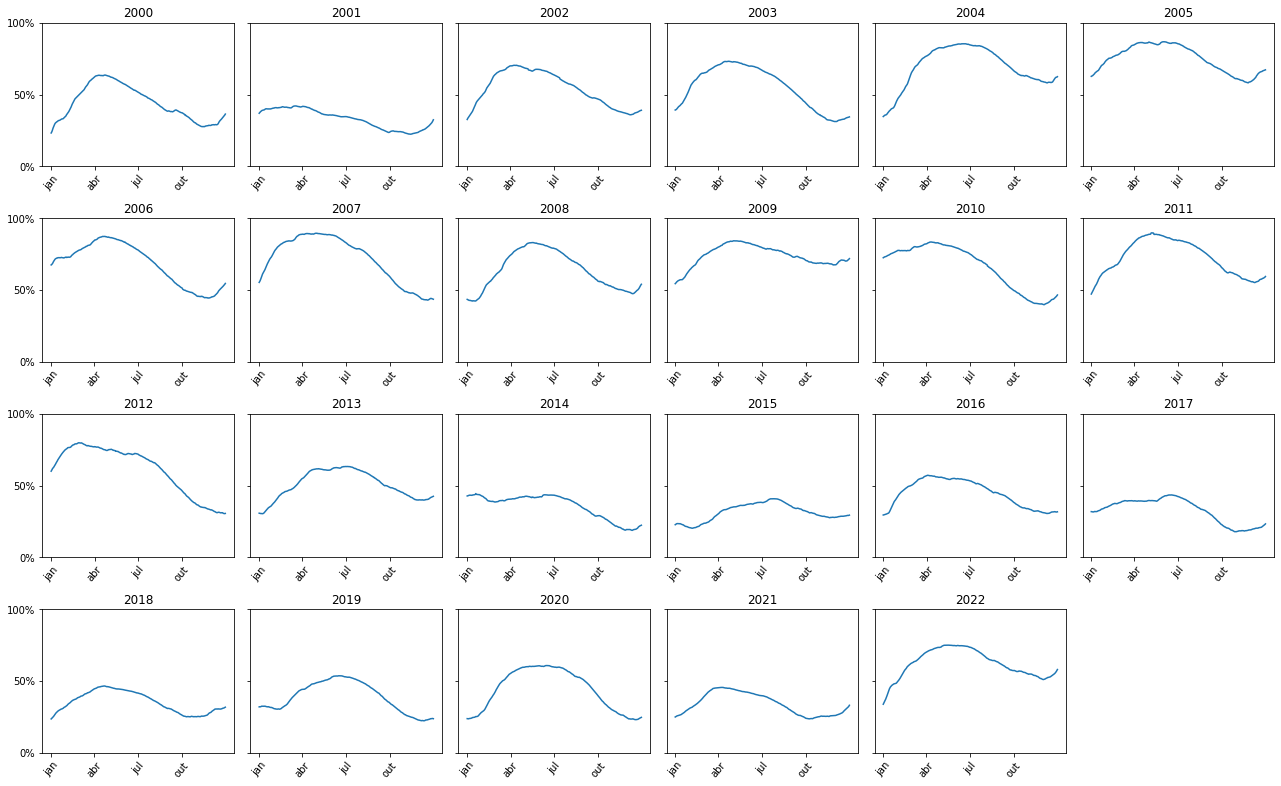

In [36]:
n_rows=4
n_columns = 6

fig, ax = plt.subplots(n_rows,n_columns)
fig.set_size_inches(18, 11)


a = list(range(n_rows))
b = list(range(n_columns))
generator = ((element_a,element_b) for element_a in a for element_b in b)

#ax[0][0].plot(armazenamento_total_df.loc[lambda x: x.index==year].index,armazenamento_total_df.loc[lambda x: x.index==year]['EAR%'].values)

for year in range(2000,2024):
    index = next(generator)
    axis = ax[index[0]][index[1]]
    axis.plot(armazenamento_total_df.loc[lambda x: x.index.year==year].index,armazenamento_total_df.loc[lambda x: x.index.year==year]['EAR%'].values)
    axis.set_yticks([0,50,100])
    axis.set_title(str(year))

    if index[1]==0:
        axis.set_yticklabels(['0%','50%','100%'])
    else:
        axis.set_yticklabels(['','',''])


    daterange = pd.date_range(start =f'{year}-01-01', end =f'{year}-12-31', freq ='3MS')
    label = [datetime.datetime.strftime(date,'%b') for date in daterange]
    axis.set_xticks(daterange)
    axis.set_xticklabels(label)

    axis.tick_params(axis='x',rotation=50)

# for index in ((element_a,element_b) for element_a in a for element_b in b):
#     axis = ax[index[0]][index[1]]
#     print(axis.lines)

fig.tight_layout(pad=1)

ax[-1][-1].axis('off')
ax[-1][-1].set_title('')
ax[-1][-1].lines[0].remove()

plt.savefig('EAR GRID.png', dpi=300)


(-55.0, 90.0)

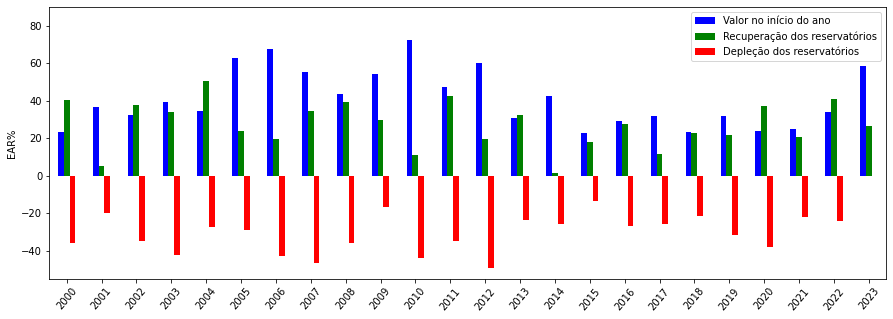

In [47]:
ax = analise_df[['first', 'Variação', 'Variação_f']].plot(kind='bar', figsize=(15,5), color=['blue','green','red'])
ax.set_xticklabels([datetime.datetime.strftime(date,'%Y') for date in analise_df.index ])
ax.tick_params(axis='x',rotation=50)
ax.legend(['Valor no início do ano','Recuperação dos reservatórios','Depleção dos reservatórios'])
ax.set_xlabel('')
ax.set_ylabel('EAR%')
ax.set_ylim((-55,90))

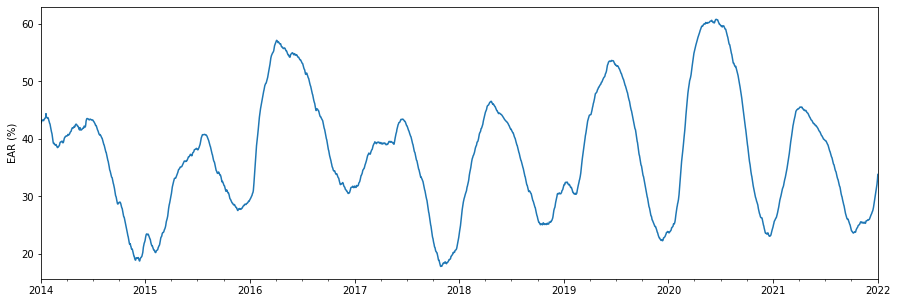

In [38]:
ax = (zoom_dataframe[zoom_dataframe.columns[1::3]].sum(axis=1)/zoom_dataframe[zoom_dataframe.columns[0::3]].sum(axis=1)*100).plot(ylabel='EAR (%)', xlabel='', figsize=(15,5))
#ax.legend(['TOTAL'], loc='upper left', fontsize=15)

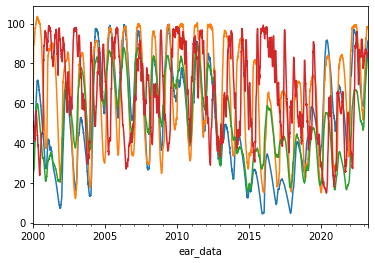

In [39]:
ax = final_dataframe[final_dataframe.columns[2::3]].plot(legend='')

In [40]:
pos=['upper left', 'lower left', 'upper left', 'lower left']

C:\Users\lauro\AppData\Local\Temp\ipykernel_3732\481848129.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_iches" which is no longer supported as of 3.3 and will become an error in 3.6
  _ = plt.savefig('Níveis_Energia_Armazenada.svg', bbox_iches='tight')


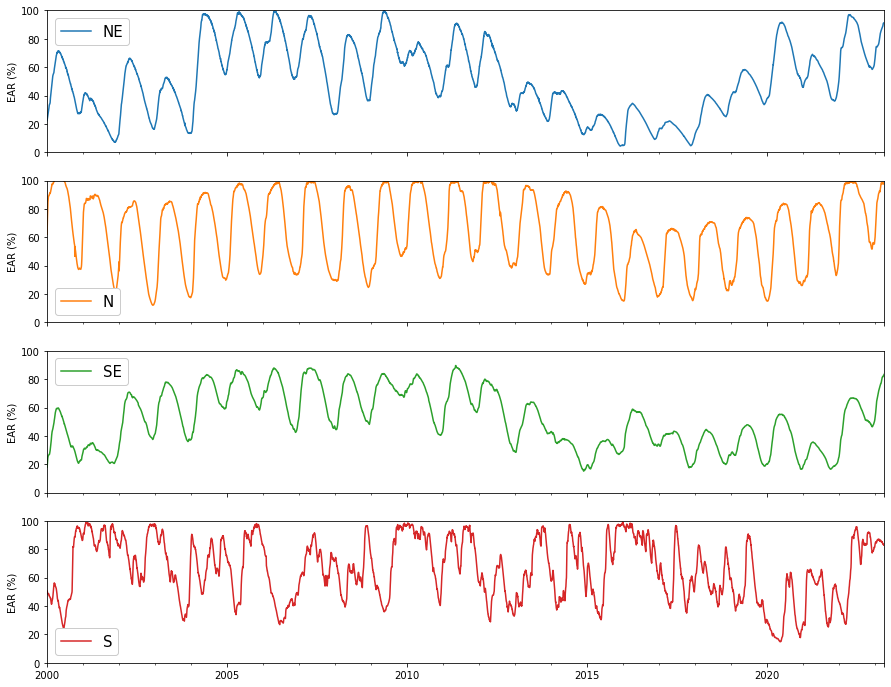

In [41]:
subplots = final_dataframe[final_dataframe.columns[2::3]].plot(subplots=True, layout=(4,1), figsize=(15,12), ylabel='EAR (%)', ylim=(0,100), xlabel='')
for i, subplop in enumerate(subplots):
    subplop[0].legend([id_subs[i]], loc=pos[i], framealpha=1, fontsize=15)
_ = plt.savefig('Níveis_Energia_Armazenada.svg', bbox_iches='tight')

In [42]:
final_dataframe

,ear_max_subsistema_NE,ear_verif_subsistema_mwmes_NE,ear_verif_subsistema_percentual_NE,ear_max_subsistema_N,ear_verif_subsistema_mwmes_N,ear_verif_subsistema_percentual_N,ear_max_subsistema_SE,ear_verif_subsistema_mwmes_SE,ear_verif_subsistema_percentual_SE,ear_max_subsistema_S,ear_verif_subsistema_mwmes_S,ear_verif_subsistema_percentual_S
ear_data,,,,,,,,,,,,
2000-01-01,49967.000000,11171.000000,22.360001,12311.000000,7656.000000,62.189999,155759.000000,27853.000000,17.879999,13976.000000,7094.000000,50.759998
2000-01-02,49967.000000,11395.000000,22.809999,12311.000000,7947.000000,64.550003,155759.000000,28671.000000,18.410000,13976.000000,7084.000000,50.689999
2000-01-03,49967.000000,11523.000000,23.059999,12311.000000,8369.000000,67.980003,155759.000000,30000.000000,19.260000,13976.000000,7016.000000,50.200001
2000-01-04,49967.000000,11754.000000,23.520000,12311.000000,8735.000000,70.949997,155759.000000,31898.000000,20.480000,13976.000000,6980.000000,49.939999
2000-01-05,49967.000000,12032.000000,24.080000,12311.000000,9099.000000,73.910004,155759.000000,33627.000000,21.590000,13976.000000,6946.000000,49.700001
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28,51691.226562,47179.382812,91.271599,15302.396484,14928.441406,97.556198,204615.328125,169094.890625,82.640404,20459.242188,17056.121094,83.366302
2023-03-29,51691.226562,47145.179688,91.205399,15302.396484,14934.890625,97.598396,204615.328125,169347.343750,82.763802,20459.242188,16988.232422,83.034500
2023-03-30,51691.226562,47148.433594,91.211700,15302.396484,14943.821289,97.656700,204615.328125,169770.281250,82.970497,20459.242188,16976.476562,82.977097
